<a href="https://colab.research.google.com/github/TheCeloReis/mapeamento-saude-digital/blob/main/test-local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# pyBibX - A Bibliometric and Scientometric Library
# Example - PubMed

# Citation:
# PEREIRA, V.; BASILIO, M.P.; SANTOS, C.H.T. (2025). PyBibX: A Python Library for Bibliometric and
# Scientometric Analysis Powered with Artificial Intelligence Tools. Data Technologies and Applications.
# Vol. 59, Iss. 2, pp. 302-337. doi: https://doi.org/10.1108/DTA-08-2023-0461

############################################################################

In [ ]:
# Restart the session afther this cell to avoid Google Colab errors
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas

In [ ]:
!pip install pybibx
!pip install tabulate

In [ ]:
# Dowload .bib file
!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/pubmed.txt

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from google.colab import data_table
from tabulate import tabulate
from prettytable import PrettyTable
from pybibx.base import pbx_probe

# Load Dataset
---
In this section, we will load and inspect the dataset.

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'pubmed.txt'
database  = 'pubmed'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 334 Documents were Found ( 335 Documents and 1 Duplicates )

Article = 291
Book = 1
Review = 42


In [ ]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

Entries Completeness (%) Number of  Docs
0             Sources           99.70%             333
1           Abstracts          100.00%             334
2         Affiliation          100.00%             334
3           Author(s)          100.00%             334
4                 DOI           92.22%             308
5  Keywords - Authors           65.87%             220
6     Keywords - Plus           83.23%             278
7          References            0.00%               0
8                Year          100.00%             334

In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

Main Information    Results
0                                Timespan  1990-2023
1               Total Number of Countries         56
2            Total Number of Institutions        336
3                 Total Number of Sources        145
4              Total Number of References          0
5               Total Number of Languages          4
6                  --eng; por (# of docs)          1
7                  --eng; spa (# of docs)          1
8                   --english (# of docs)        331
9                --portuguese (# of docs)          1
10                                   -//-       -//-
11              Total Number of Documents        334
12                              --Article        291
13                                 --Book          1
14                               --Review         42
15           Average Documents per Author       1.17
16      Average Documents per Institution        5.8
17           Average Documents per Source        2.3
18             Average Documents per Year      13.92
19                                   -//-       -//-
20                Total Number of Authors       1770
21       Total Number of Authors Keywords        837
22  Total Number of Authors Keywords Plus       1163
23        Total Single-Authored Documents         12
24         Total Multi-Authored Documents        322
25            Average Collaboration Index       6.03
26                            Max H-Index          0
27                                   -//-       -//-
28              Total Number of Citations          0
29           Average Citations per Author        0.0
30      Average Citations per Institution        0.0
31         Average Citations per Document        0.0
32           Average Citations per Source        0.0
33                                   -//-       -//-

In [ ]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+--------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

In [ ]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

In [ ]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

In [ ]:
# These indices are local (considers only the .bib scope)
# H-index measures their academic impact by identifying the number of papers (h) that have each received at least h citations
# E-Index quatifies excess citations within the H-core revealing "hidden" impact beyond the H-index threshold.
# The G-Index emphasizes highly cited work, making it sensitive to breakthrough publications.
# The M-Index contextualizes the H-index by normalizing it over the researcher’s career duration
aut_m = bibfile.m_index(2022)
df_idx = {
    'Author': bibfile.u_aut,
    'H-index': bibfile.aut_h,
    'E-Index': bibfile.aut_e,
    'G-Index': bibfile.aut_g,
    'M-Index': aut_m
}

df_idx = pd.DataFrame(df_idx)
df_idx

Author  H-index  E-Index  G-Index  M-Index
0        aarabi b        0      0.0        0      0.0
1         abaab n        0      0.0        0      0.0
2         abaza s        0      0.0        0      0.0
3        abbott c        0      0.0        0      0.0
4       abbott jh        0      0.0        0      0.0
...           ...      ...      ...      ...      ...
1765  zydlewski j        0      0.0        0      0.0
1766       zyla a        0      0.0        0      0.0
1767        ágh t        0      0.0        0      0.0
1768    álvarez e        0      0.0        0      0.0
1769  śmietanka k        0      0.0        0      0.0

[1770 rows x 5 columns]

In [ ]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

In [ ]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

In [ ]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

In [ ]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

In [ ]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

# Exploratory Data Analysis
---
In this section, we will perform EDA

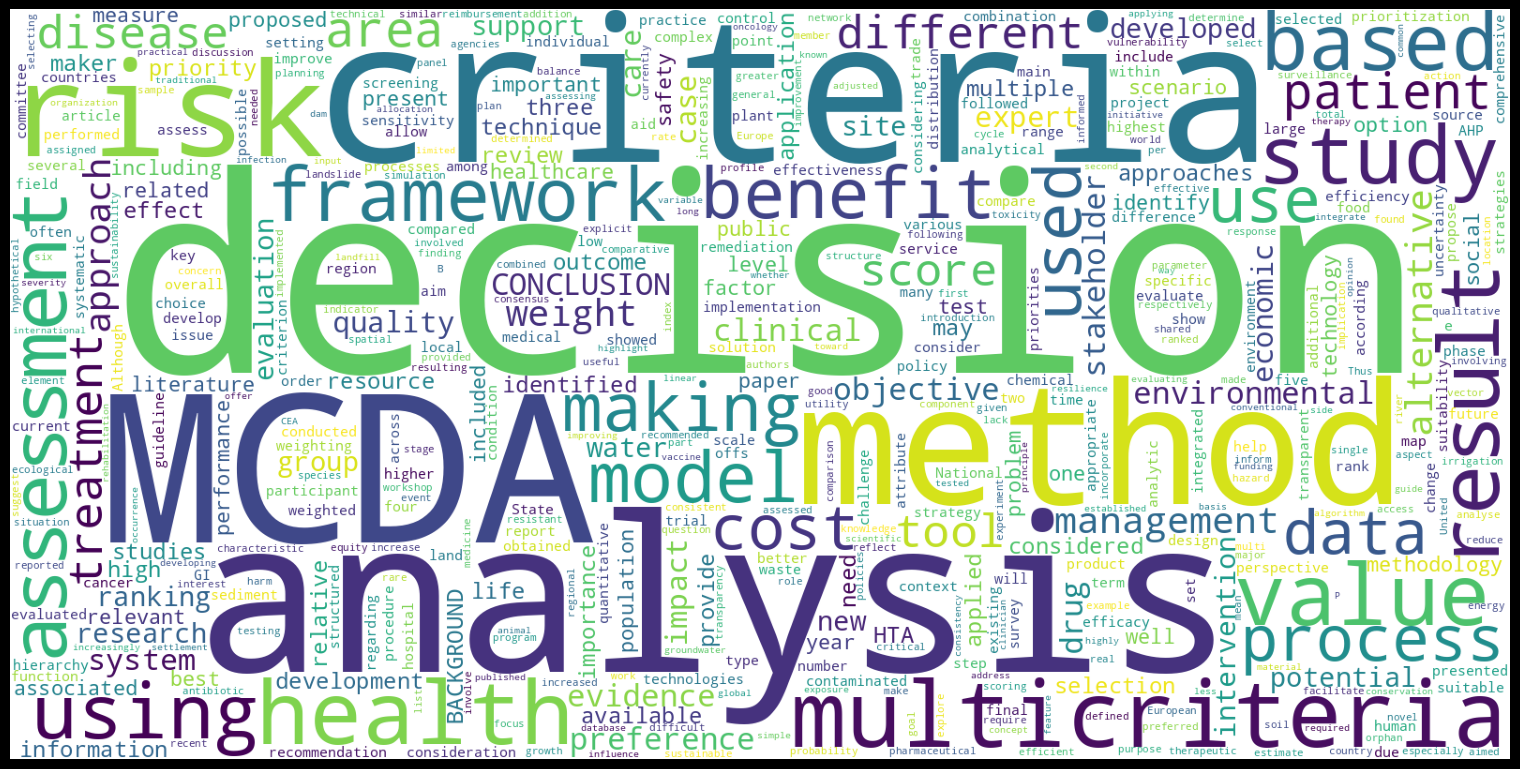

In [ ]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry             = 'abs', 'title', 'kwa', or 'kwp'
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500, rmv_custom_words = [])

In [ ]:
# Check Table
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|     Word 1     | Importance 1 |     Word 2     | Importance 2 |     Word 3     | Importance 3 |     Word 4     | Importance 4 |     Word 5     | Importance 5 |
+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|    decision    |     1.0      |    analysis    |    0.5797    |      MCDA      |    0.5305    |    criteria    |    0.5187    |     method     |    0.4791    |
|      risk      |    0.3861    | multicriteria  |    0.3711    |     health     |    0.3412    |     value      |    0.323     |     result     |    0.3187    |
|     study      |    0.293     |   assessment   |    0.2781    |     based      |    0.2749    |     using      |    0.2567    |   framework    |    0.2503    |
|    benefit     |    0.2396

In [ ]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

In [ ]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Only relevant if  cluster_method = 'kmeans'.Number of Clusters.;
#            node_labels       = If True, labels appear in nodes;
#            node_size         = Node size;
#            node_font_size    = Node font size;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            model             = Only relevant if 'embeddings = True'. Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased';
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used);
#            showlegend        = If True, shows legend;
#            cluster_method    = 'kmeans' or 'hdbscan';
#            min_size          = Only relevant if  cluster_method = 'hdbscan'. Minimum number of elements in a Cluster;
#            max_size          = Only relevant if  cluster_method = 'hdbscan'. Maximum number of elements in a Cluster
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             node_labels       = True,
                                             node_size         = 12,
                                             node_font_size    = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             model             = 'allenai/scibert_scivocab_uncased',
                                             method            = 'umap',
                                             showlegend        = True,
                                             cluster_method    = 'kmeans',
                                             min_size          = 5,
                                             max_size          = 50
                                             )

In [ ]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

In [ ]:
# Check Articles per Cluster
cluster      = 2
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

14, 17, 33, 38, 97, 99, 102, 111, 115, 117, 118, 128, 130, 133, 134, 161, 173, 178, 182, 184, 187, 188, 191, 194, 196, 198, 207, 214, 217, 221, 230, 236, 245, 259, 265, 271, 275, 276, 278, 291, 294, 299, 303, 306, 307, 308, 312, 314, 319, 324


In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = [],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2021)

In [ ]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2011: flood-risk analysis (1), dam removal (1), dam decommissioning (1), aging dams (1) 2013: multicriteria decision analysis (2), orphan drugs (1),
conflicto ambiental (1), conservation planning (1), decision-support tools (1), drug attributes (1), drug selection (1), emerging disease (1),
environmental conflict (1), herramientas de apoyo de decisión (1) 2014: multicriteria decision analysis (3), multicriteria decision analysis (mcda)
(2), monte carlo simulation (2), dempster–shafer theory (2), health inequalities (1), rehabilitation (1), regional land planning (1), redd+ (1),
priorización (1), multicriteria decision (1) 2015: multicriteria decision analysis (4), decision making (4), multi-criteria decision analysis (2),
analytic hierarchy process (2), generic drug (1), participatory approaches (1), ordinal information (1), oncology (1), nanoinformatics (1),
multidisciplinary team (1) 2016: multicriteria decision analysis (7), multi-criteria decision analysis (2), green analytical ch

In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn              = Most frequent n words
#            custom            = Plot specific words
bibfile.plot_evolution_year_complement(data_ep, view = 'notebook', topn = 10, custom = [])

In [ ]:
# Sankey Diagram (An interactive plot)
# Arguments:
#   view         : Determines the rendering mode.'notebook' -> Plots in your preferred Notebook app. 'browser'  -> Plots in your preferred browser window.
#   entry        : A list defining the sequence of data columns to be visualized. Allowed keys: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'
#   rmv_unknowns : Boolean flag controlling how unknown entries are handled. True  -> Remove any relationships that include 'unknown'.
#   topn         : Specifies the maximum number of top entities/connections to display at each level. Set to "None" for no filtering or provide a list with limits corresponding to each connection between the nodes defined in 'entry'.
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'lan'], topn = [3, 5], rmv_unknowns = True)

# PS: The white bars can be dragged

In [ ]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

In [ ]:
# Plot Count Y per X (An interactive bar chart)
# Arguments:
#   view          : Determines where the plot will be rendered. 'browser'  -> Plots in your preferred browser window. 'notebook' -> (if supported) Plots within your notebook environment.
#   rmv_unknowns  : Boolean flag to handle unknown entries. True  -> Removes any relationships containing unknown values.
#   x             : The key (column) to use for the X-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'cout'.
#   y             : The key (column) to use for the Y-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'aut'.
#   topn_x        : Maximum number of top X categories (based on total counts) to display. Default is 5.
#   topn_y        : Maximum number of top Y entries (per X category) to display. Default is 5.
#   text_font_size: Font size for the text labels displayed inside the bars. Default is 12.
#   x_angle       : Angle (in degrees) for the X-axis tick labels. Default is -90 (rotating labels vertically).
bibfile.plot_count_y_per_x(view = 'notebook', rmv_unknowns = True, x = 'cout', y = 'aut', topn_x = 5, topn_y = 5, text_font_size = 12, x_angle = -90)

In [ ]:
# View Table
data_table.DataTable(bibfile.top_y_x, num_rows_per_page = 15)

In [ ]:
# Plot Heatmap Y per X (An interactive bar chart)
# Arguments:
#   view          : Determines where the plot will be rendered. 'browser'  -> Plots in your preferred browser window. 'notebook' -> (if supported) Plots within your notebook environment.
#   rmv_unknowns  : Boolean flag to handle unknown entries. True  -> Removes any relationships containing unknown values.
#   x             : The key (column) to use for the X-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'cout'.
#   y             : The key (column) to use for the Y-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'aut'.
#   topn_x        : Maximum number of top X categories (based on total counts) to display. Default is 5.
#   topn_y        : Maximum number of top Y entries (per X category) to display. Default is 5.
bibfile.plot_heatmap_y_per_x(x = 'kwa', y = 'aut', topn_x = 15, topn_y = 5, rmv_unknowns = True, view = "notebook")

In [ ]:
# View Table
data_table.DataTable(bibfile.heat_y_x, num_rows_per_page = 15)

In [ ]:
# Tree Map
# Arguments: view          = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 20)

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

In [ ]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

In [ ]:
# View Table
data_cp = bibfile.ask_gpt_cp
data_table.DataTable(data_cp, num_rows_per_page = 15)

In [ ]:
# Institutions Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each institution
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.institution_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ip = bibfile.ask_gpt_ip
data_table.DataTable(data_ip, num_rows_per_page = 15)

In [ ]:
# Sources Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each source (journal)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.source_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_sp = bibfile.ask_gpt_sp
data_table.DataTable(data_sp, num_rows_per_page = 15)

In [ ]:
# Bar Plots
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#                    statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#                         topn = Total number entities
bibfile.plot_bars(view = 'notebook', statistic = 'apd', topn = 20)

In [ ]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

# Network Analysis
---
In this section, we will perform Network Analysis

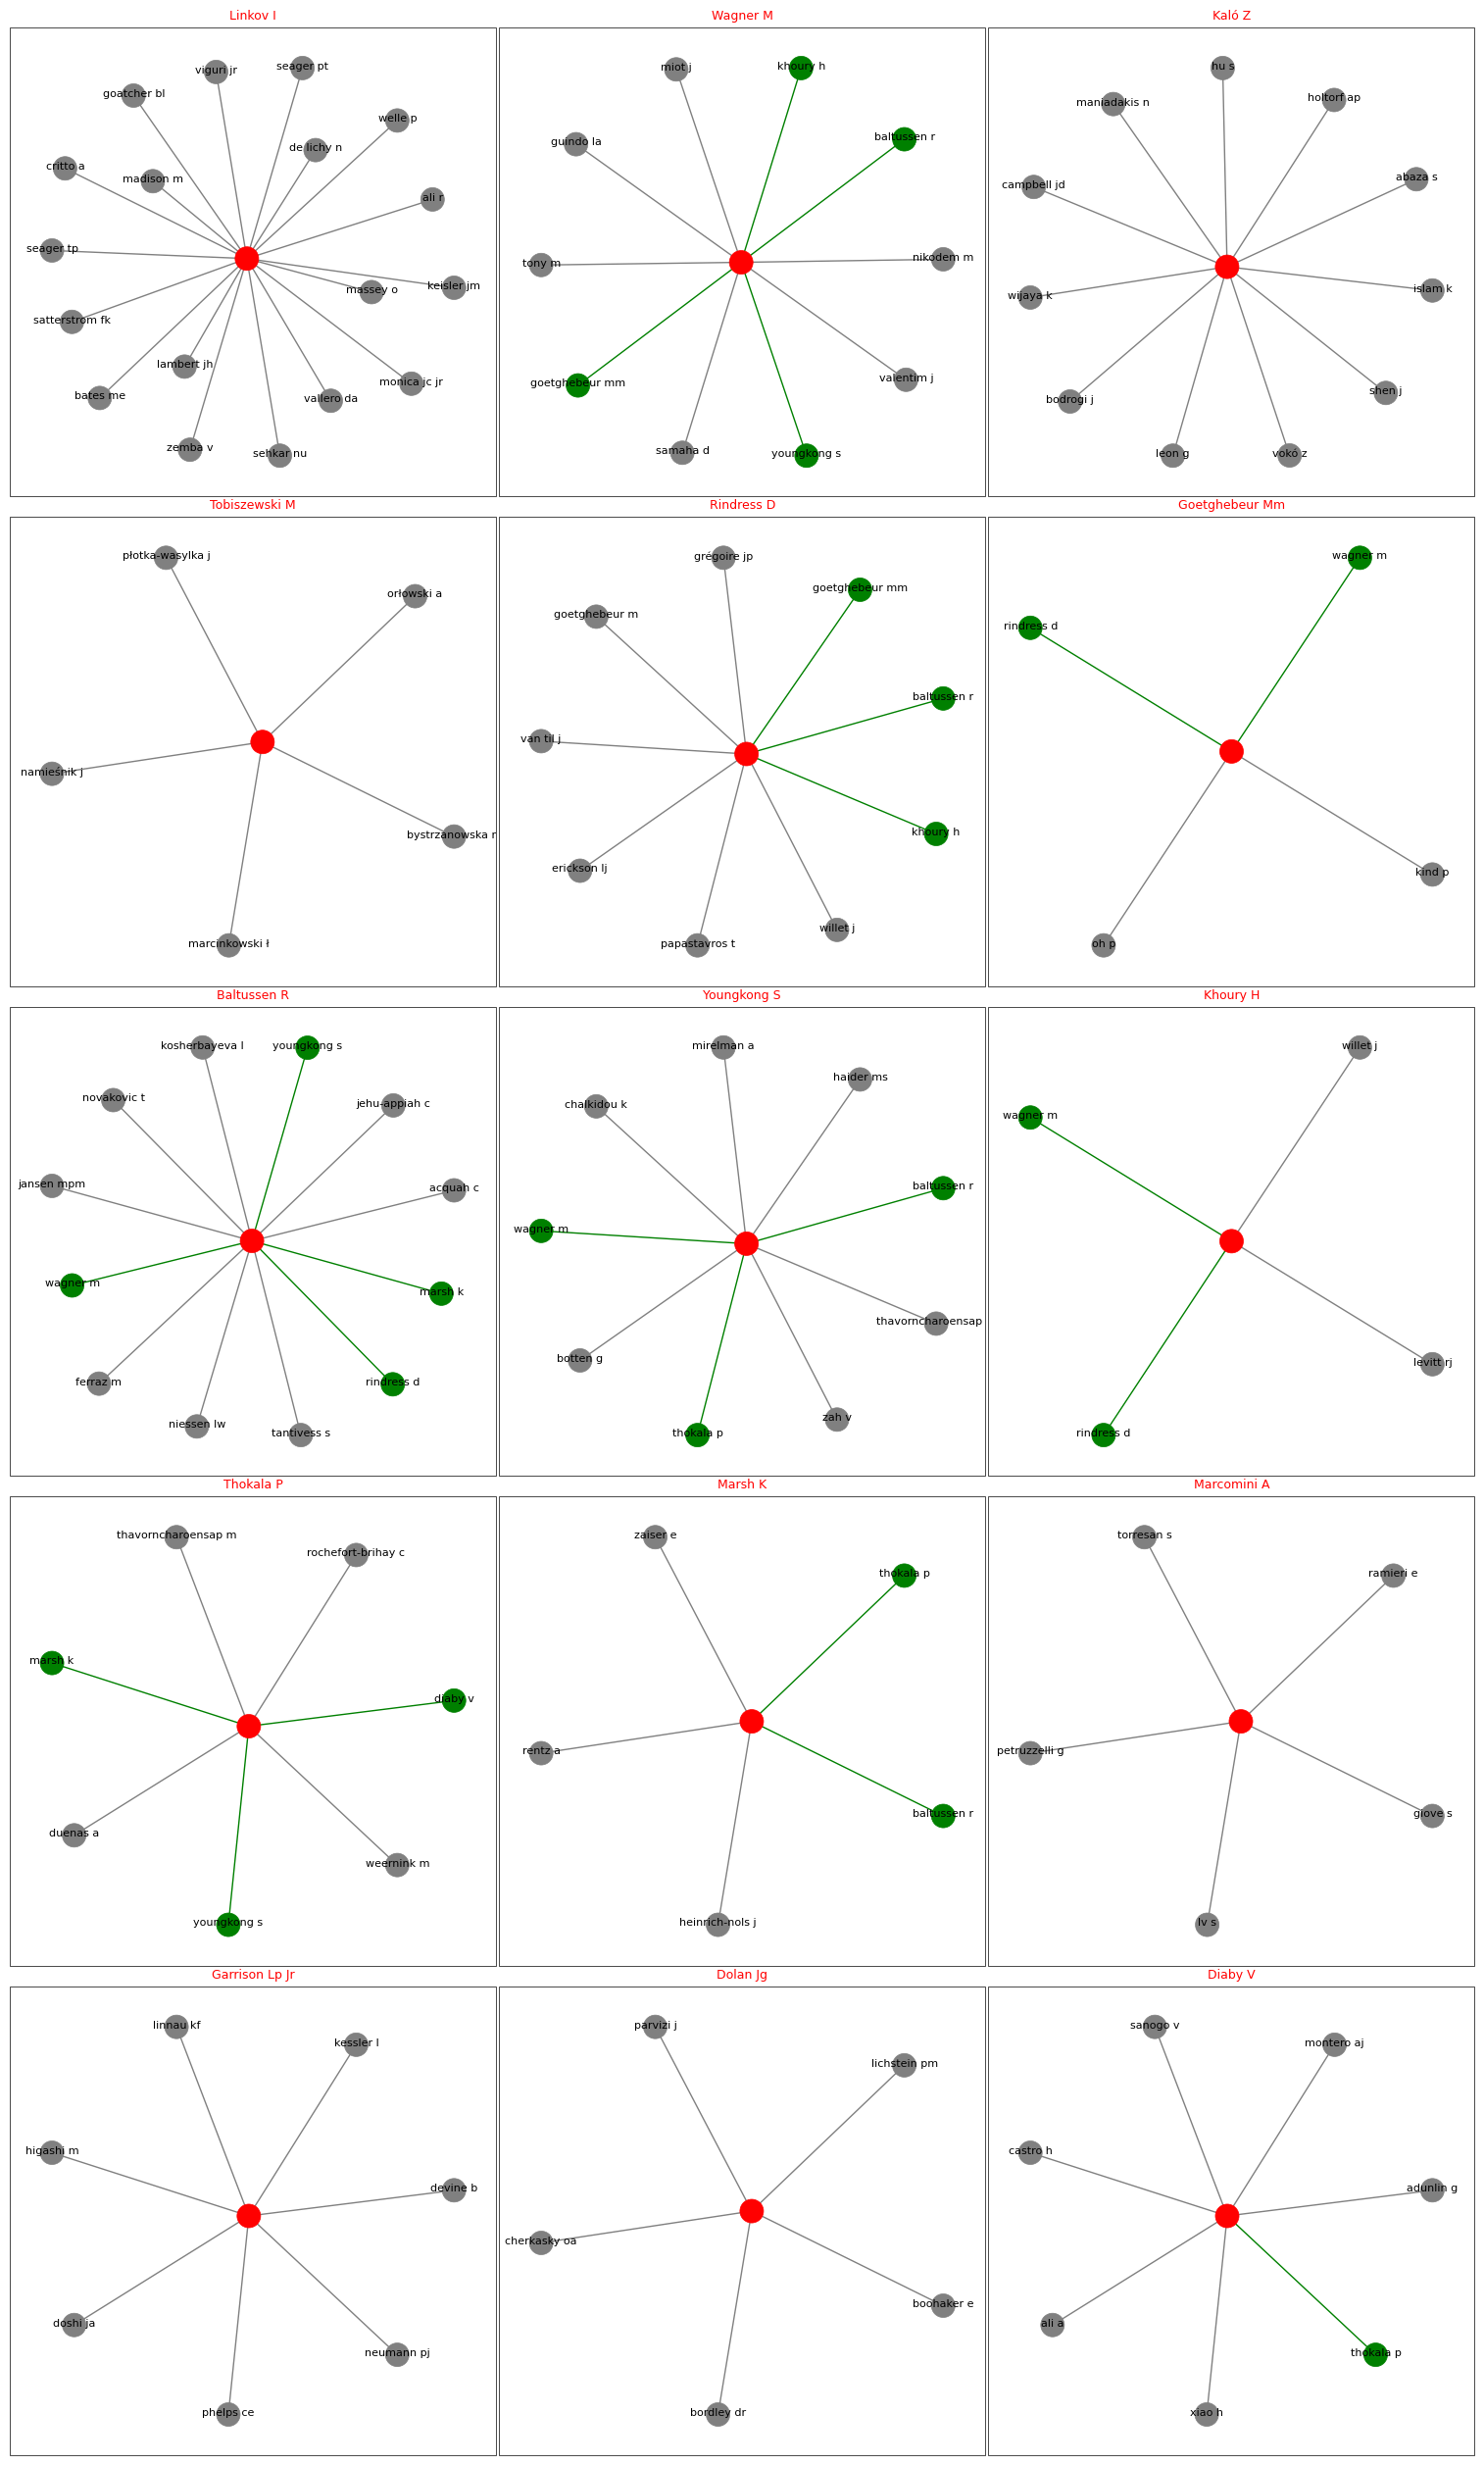

In [ ]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = False)

In [ ]:
print(bibfile.ask_gpt_ct)

[[['linkov i'], ['ali r', 'bates me', 'critto a', 'de lichy n', 'goatcher bl', 'keisler jm', 'lambert jh', 'madison m', 'massey o', 'monica jc jr', 'satterstrom fk', 'seager pt', 'seager tp', 'sehkar nu', 'vallero da', 'viguri jr', 'welle p', 'zemba v']], [['wagner m'], ['baltussen r', 'goetghebeur mm', 'guindo la', 'khoury h', 'miot j', 'nikodem m', 'samaha d', 'tony m', 'valentim j', 'youngkong s']], [['kaló z'], ['abaza s', 'bodrogi j', 'campbell jd', 'holtorf ap', 'hu s', 'islam k', 'leon g', 'maniadakis n', 'shen j', 'vokó z', 'wijaya k']], [['tobiszewski m'], ['bystrzanowska m', 'marcinkowski ł', 'namieśnik j', 'orłowski a', 'płotka-wasylka j']], [['rindress d'], ['baltussen r', 'erickson lj', 'goetghebeur m', 'goetghebeur mm', 'grégoire jp', 'khoury h', 'papastavros t', 'van til j', 'willet j']], [['goetghebeur mm'], ['kind p', 'oh p', 'rindress d', 'wagner m']], [['baltussen r'], ['acquah c', 'ferraz m', 'jansen mpm', 'jehu-appiah c', 'kosherbayeva l', 'marsh k', 'niessen lw', 

In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 15)

In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['youngkong s'], node_only = False)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
#bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 10)

In [ ]:
# PubMed does not provide citation data in the .txt file

# Check Similarity Values
#data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Brazil'])

# Artificial Intelligence Analysis
---
In this section, we will perform AI Analysis

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs', model = 'allenai/scibert_scivocab_uncased')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False, model = 'allenai/scibert_scivocab_uncased')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                                          Name  \
0     -1      7             -1_risk_vaccine_decision_attitude   
1      0    177               0_decision_criteria_mcda_health   
2      1    116  1_decision_analysis_management_environmental   
3      2     34              2_risk_disease_food_surveillance   

                                      Representation  \
0  [risk, vaccine, decision, attitude, qhpv, br, ...   
1  [decision, criteria, mcda, health, analysis, m...   
2  [decision, analysis, management, environmental...   
3  [risk, disease, food, surveillance, antibiotic...   

                                 Representative_Docs  
0  [fields decisions including health nowadays co...  
1  [objectives main objectives article fold explo...  
2  [decision making sediment management complex t...  
3  [risk maps sources inform risk based disease s...  


In [ ]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

-1   0   1  2  Total
linkov i         1   0  18  1     20
wagner m         0  11   0  0     11
kaló z           0   9   0  0      9
tobiszewski m    0   0   8  0      8
baltussen r      0   8   0  0      8
rindress d       0   7   0  0      7
goetghebeur mm   0   7   0  0      7
youngkong s      1   5   0  0      6
khoury h         0   6   0  0      6
thokala p        1   4   0  0      5
marsh k          0   5   0  0      5
marcomini a      0   0   5  0      5
garrison lp jr   0   5   0  0      5
dolan jg         0   5   0  0      5
diaby v          0   5   0  0      5

In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_time(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

Topic           Docs
0   -1.0               
1    0.0     2; 18; 113
2    1.0  266; 284; 168
3    2.0  133; 299; 312

In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  1 Correlation:  0.033
Topic:  -1 Correlation:  0.018
Topic:  0 Correlation:  0.016
Topic:  2 Correlation:  0.005


In [ ]:
# NLP
# Arguments: doc_id = Article ID. For the specified article, this function evaluates how each word in its abstract semantically aligns with all topics in the model.
df = bibfile.topics_words(doc_id = 42)
df

Topic 0   Topic 1  \
Background                                          0.000000  0.000000   
There                                               0.000000  0.000000   
is                                                  0.000000  0.000000   
growing                                             0.000000  0.000000   
interest                                            0.165849  0.159207   
...                                                      ...       ...   
realism                                        ...  0.000000  0.000000   
as                                             ...  0.000000  0.000000   
tool                                           ...  0.000000  0.000000   
for                                            ...  0.000000  0.000000   
SDM                                            ...  0.000000  0.000000   

                                                    Topic 2  
Background                                              0.0  
There                                                   0.0  
is                                                      0.0  
growing                                                 0.0  
interest                                                0.0  
...                                                     ...  
realism                                        ...      0.0  
as                                             ...      0.0  
tool                                           ...      0.0  
for                                            ...      0.0  
SDM                                            ...      0.0  

[250 rows x 3 columns]

In [ ]:
# NLP
bibfile.topic_model.save('my_topic_model')
#bibfile.topics_load_file('my_topic_model')

In [ ]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [ ]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'mcda', word_2 = 'risk')
similarity

0.9715953

In [ ]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['mcda', 'risk'])
results

[(6,
  'CONTEXT: The nonspecific storage symptom complex overactive bladder (OAB) is an important clinical condition in functional urology. Until recently, pharmacological therapy comprised antimuscarinic drugs, but more recently beta 3 agonists have added to the available agents. Traditional reporting of efficacy and safety of these agents relies upon regulatory placebo-controlled studies. There remains no head-to-head comparison of existing agents in the contemporary literature. Contemporary conclusions on comparative efficacy and safety drawn from the use of these agents are based on systematic reviews of the literature and associated meta-analyses. OBJECTIVE: In this study, we used the analytical model of multicriteria decision analysis (MCDA) to compare contemporary pharmacotherapy for OAB. EVIDENCE ACQUISITION: Efficacy and safety data from published, randomised, placebo-controlled trials of antimuscarinic antagonists, the beta 3 agonist, and the combination of an antimuscarinic 

In [ ]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('omcda', 0.9998518824577332),
 ('multidex', 0.9998107552528381),
 ('smcda', 0.9997987747192383),
 ('analytic', 0.999721348285675),
 ('mcd', 0.9997085332870483),
 ('multiyear', 0.9997032880783081),
 ('analytics', 0.9996928572654724),
 ('paralysis', 0.9996814131736755),
 ('multitude', 0.9996418356895447),
 ('multidrug', 0.999638557434082)]

In [ ]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'group'], ['decision'],             ['group']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 5,
                             node_size = 10,
                             font_size = 14)

In [ ]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [305, 34, 176], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

<pad>The aim of this study was to develop a practical framework to facilitate decisionmaking in terms of the reimbursement of orphan medicinal
products.</s>


In [ ]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [305, 34, 176], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID34 Number of Characters: 2479
Document ID176 Number of Characters: 2161
Document ID305 Number of Characters: 1724

Total Number of Valid Abstracts:  3.0



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

Patient access to orphan medicinal products (OMPs) is limited and varies between countries, reimbursement decisions on OMPs are complex, and there is a need for more transparent processes to know which criteria should be considered to inform these
decisions. This study aimed to determine the most relevant criteria for the reimbursement of OMPs in Spain, from a multi-stakeholder perspective, and using multicriteria decision analysis (MCDA). An MCDA was developed in 3 phases and included 28
stakeholders


In [ ]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [305, 34, 176])


Total Number of Valid Abstracts:  3



Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

BACKGROUND: Patient access to orphan medicinal products (OMPs) is limited and varies between countries, reimbursement decisions on OMPs are complex,
and there is a need for more transparent processes to know which criteria should be considered to inform these decisions. RESULTS: Thirteen criteria
were selected, related to 4 dimensions: patient population, disease, treatment, and economic evaluation. RESULTS: A framework was developed consisting
of seven modules that can evolve over the life cycle of a healthcare intervention. A multicriteria decision analysis (MCDA) Value Matrix (VM) was
developed to include the 15 quantifiable components that are currently considered in decisionmaking. A Quality Matrix was designed to quantify three
criteria of quality for the 12 types of evidence usually required by decisionmakers. It provides a collaborative framework that could connect all
stakeholders and serve the healthcare community at local, national and international levels by allowing sharin

# Correction and Data Manipulation
---
In this section, we will show how to Correct & Manipulate your Data

In [ ]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')
bibfile.merge_reference(get = [], replace_for = 'name')

In [ ]:
# Work with modified .bib File

# 1) Input a .bib to instantiate a class => bibfile  = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)
# 2) Then made the modifications and save the data externally => bibfile.save_database(sep = '\t', name = 'data.csv')
# 3) To load the modified .bib file ( 'data.csv') => bibfile.load_database(name = 'data.csv')

# PS: Even with the saved 'data.csv', you always need to do step 1, so to be fast, have any small .bib file in hand.
# Then, you can go directly to step 3, and your saved .bib ('data.csv') will replace the small .bib